# 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area. You’ve recently learned data manipulation and plotting, and are helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

Your challenge:

Create a report to answer your colleague's questions and include visualize findings.

- What are the total sales for each payment method?
- What is the average unit price for each product line?
- Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
- Summarize your findings.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## Import Libraries and Data

In [1]:
# Importing the pandas module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.renderers.default = "svg"

In [2]:
# Reading in the sales data
df = pd.read_csv('sales_data.csv', parse_dates=['date']) 
# parse_dates option to ensure that the "date" column is loaded correctly

df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


*Total of 1000 entries and 8 columns*

In [4]:
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek
#get month and day of week from date

In [5]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,month,dayofweek
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,6,1
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,6,1
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,6,1
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,6,1
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,6,1


# EDA 

### Total sales for each payment method

In [6]:
payment_total_sales= df.groupby('payment')[['total']].sum()
payment_total_sales

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


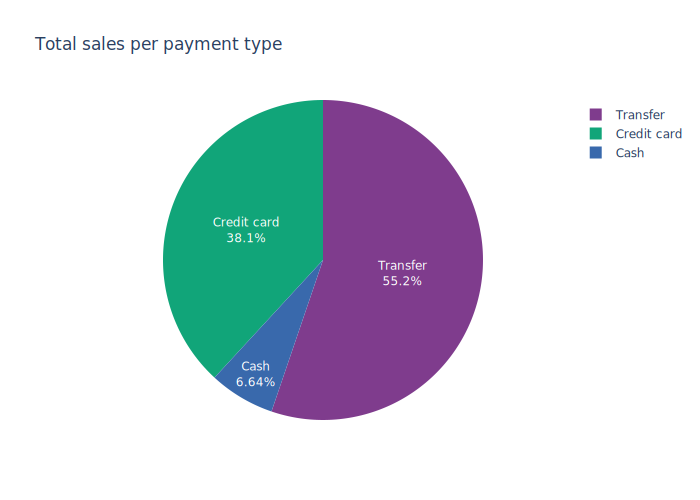

In [7]:
fig = px.pie(payment_total_sales, values= 'total', names = payment_total_sales.index, title = 'Total sales per payment type',
            color_discrete_sequence= px.colors.qualitative.Bold)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

*55.2% of the total sales come from transfer payment type and has generated total of \\$159.642.33 sales*, *following by credit card at 38.1% with total sales of \\$110,271.57*

### Total count of payment per client type

In [8]:
client_payment_type = pd.DataFrame(df.groupby(['client_type','payment']).size(), columns = ['total_count']).reset_index()
client_payment_type

,client_type,payment,total_count
0,Retail,Cash,116
1,Retail,Credit card,659
2,Wholesale,Transfer,225


In [9]:
client_payment_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   client_type  3 non-null      object
 1   payment      3 non-null      object
 2   total_count  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


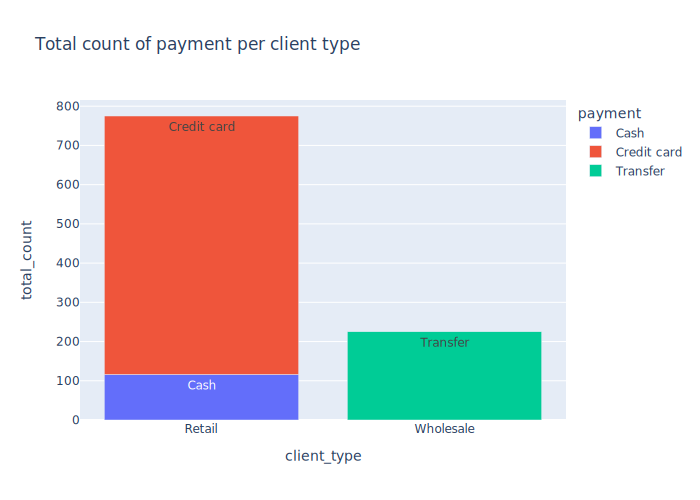

In [10]:
fig = px.bar(client_payment_type, x="client_type", y="total_count", color="payment",
             title="Total count of payment per client type", text= 'payment')
fig.show()

*This shows that retail has total more records than wholesale during this period at 775 and 85% of the payment type from Retail comes from Credit Card. Interestingly, Wholesale only have Transfer payment type means all the payment made in Wholesale is done via Transfer .*

### Average unit price for each product line

In [11]:
avg_price_product = df.groupby('product_line')[['unit_price']].mean().sort_values('unit_price',ascending='False')
avg_price_product

,unit_price
product_line,
Breaking system,17.740522
Miscellaneous,22.810738
Electrical system,25.585130
Suspension & traction,33.969868
Frame & body,42.832229
Engine,60.091803


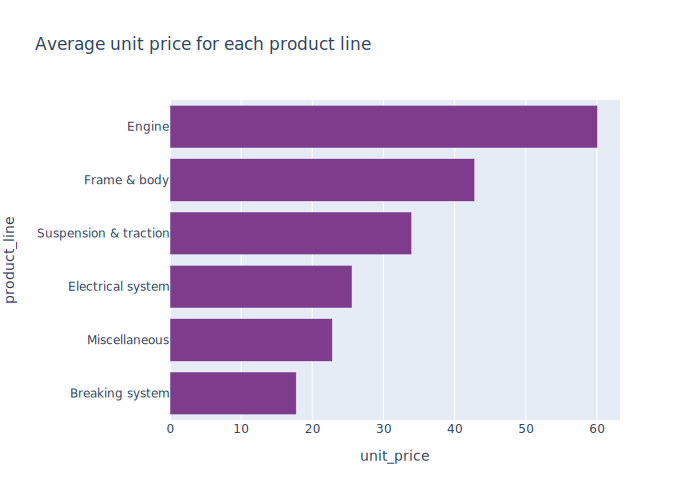

In [12]:
fig = px.bar(avg_price_product, x="unit_price", y=avg_price_product.index, orientation='h',
             title = 'Average unit price for each product line', color_discrete_sequence= px.colors.qualitative.Bold)
fig.show()

*For the month between June and August, Engine has the highest average unit price at \\$60*

In [13]:
avg_sales_product = df.groupby('product_line')[['total']].mean().sort_values('total',ascending='False')
avg_sales_product

,total
product_line,
Breaking system,166.739783
Miscellaneous,222.670656
Electrical system,225.972591
Suspension & traction,320.237763
Frame & body,415.811627
Engine,622.055410


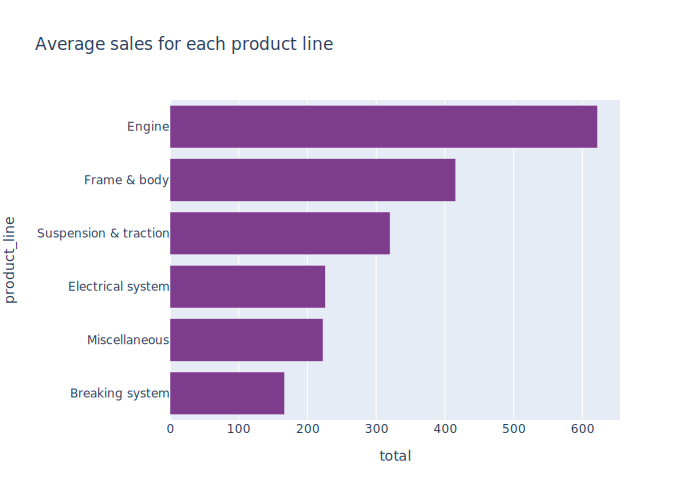

In [14]:
fig = px.bar(avg_sales_product, x="total", y=avg_sales_product.index, orientation='h',
             title = 'Average sales for each product line', color_discrete_sequence= px.colors.qualitative.Bold)
fig.show()

### Total sales per warehouse

In [15]:
warehouse_sale = df.groupby('warehouse')[['total']].sum() #dataframe of total sale per warehouse
warehouse_sale

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


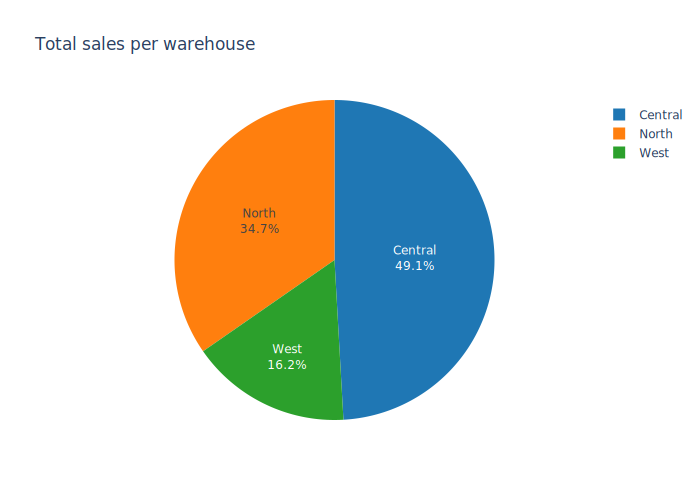

In [16]:
fig = px.pie(warehouse_sale,values = 'total', names = warehouse_sale.index, title = 'Total sales per warehouse',
            color_discrete_sequence= px.colors.qualitative.D3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

*Central warehouse make most sales comparing to North and West with 49.1%. Perhaps due to a centralize location in a large metropolitan area,this warehouse is preferred which explains why it makes most sales.*

### Total sales per client type

In [17]:
client_total_sales = df.groupby('client_type')[['total']].sum() #dataframe of total sale per warehouse
client_total_sales 

,total
client_type,
Retail,129470.67
Wholesale,159642.33


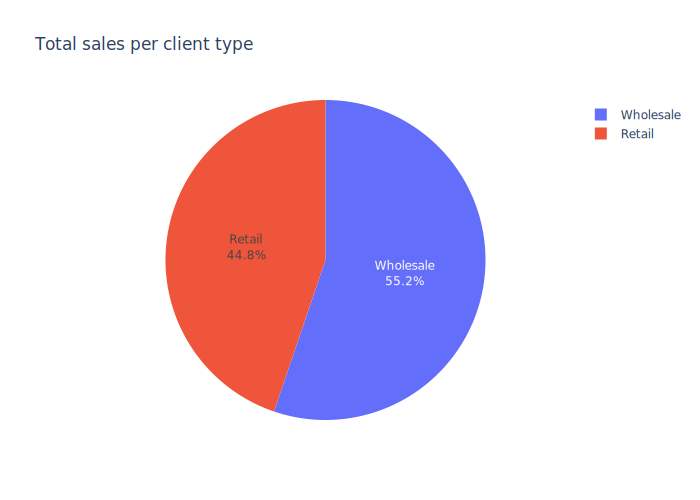

In [18]:
fig = px.pie(client_total_sales,values = 'total', names = client_total_sales.index, title = 'Total sales per client type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

*Despite retail having more records as previously shown, more sales come from wholesale rather than retail.*

### Average quantity & Average total sales per client type 

In [19]:
avg_quantity_client = df.groupby('client_type')[['quantity','total']].mean()
avg_quantity_client

,quantity,total
client_type,,
Retail,5.438710,167.058929
Wholesale,23.022222,709.521467


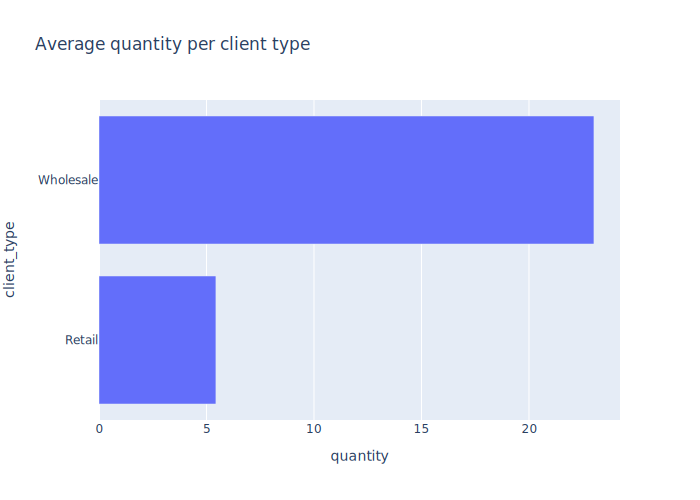

In [20]:
fig = px.bar(avg_quantity_client, x="quantity", y=avg_quantity_client.index, orientation='h',
             title = 'Average quantity per client type')
fig.show()

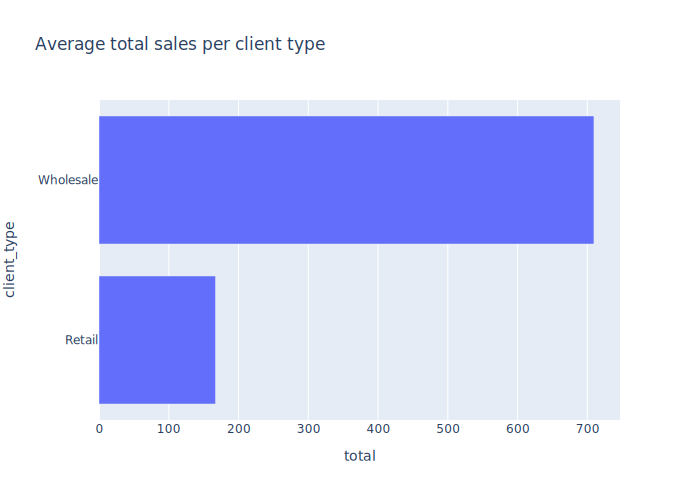

In [21]:
fig = px.bar(avg_quantity_client, x="total", y=avg_quantity_client.index, orientation='h',
             title = 'Average total sales per client type')
fig.show()

*From this table,it clearly shows why wholesale make more sales as average quantity bought per sale is at 23 quantity and with  total average sales of \\$709*. 

### Total sales per product line per client type

In [22]:
client_product_total = df.groupby(['client_type','product_line'])[['total']].sum().reset_index()
client_product_total 

,client_type,product_line,total
0,Retail,Breaking system,15219.25
1,Retail,Electrical system,21858.30
2,Retail,Engine,16709.33
3,Retail,Frame & body,29546.84
4,Retail,Miscellaneous,11418.01
5,Retail,Suspension & traction,34718.94
6,Wholesale,Breaking system,23130.90
7,Wholesale,Electrical system,21754.41
8,Wholesale,Engine,21236.05
9,Wholesale,Frame & body,39477.89


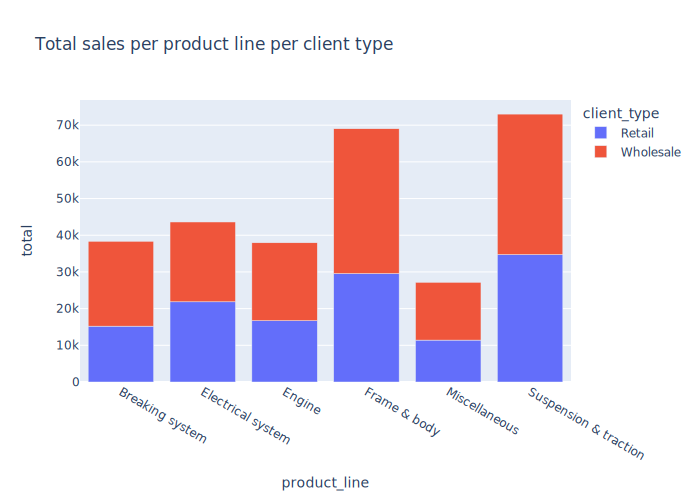

In [23]:
fig = px.bar(client_product_total, x="product_line", y='total', color='client_type',
             title = 'Total sales per product line per client type')
fig.show()

*In general,more sales as expected come from wholesales per product line.Suspension & traction makes most sales for both client type with a total of  ~\\$73k*

### Total quantiy sold per product line per client type

In [24]:
quantity_product= df.groupby(['client_type','product_line'])[['quantity']].sum().reset_index()
quantity_product

,client_type,product_line,quantity
0,Retail,Breaking system,862
1,Retail,Electrical system,862
2,Retail,Engine,279
3,Retail,Frame & body,687
4,Retail,Miscellaneous,508
5,Retail,Suspension & traction,1017
6,Wholesale,Breaking system,1268
7,Wholesale,Electrical system,836
8,Wholesale,Engine,348
9,Wholesale,Frame & body,932


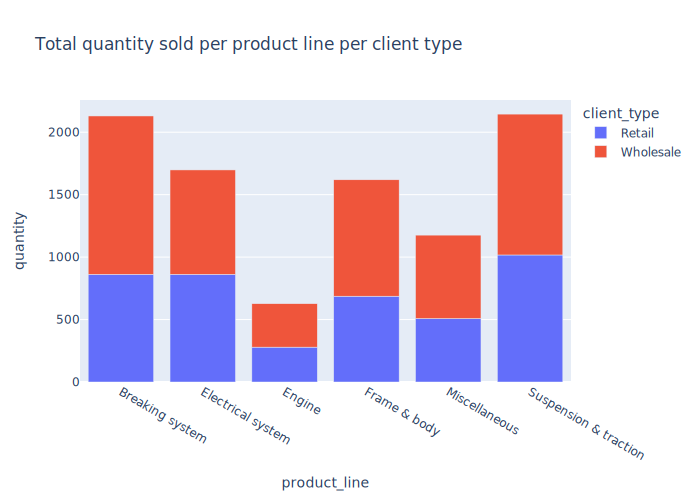

In [25]:
fig = px.bar(quantity_product, x="product_line", y='quantity', color='client_type',
             title = 'Total quantity sold per product line per client type')
fig.show()

*This shows that suspension&traction have the highest quantity sold for both client type.<br/>*
*Surprisingly, breaking system sold as close as suspension&traction but does not have highe total sales.  <br/>*
*This is perhaps due to having the lowest average unit price thus require to sell much more quantity to have higher sales in this product.*

### Total sales per month between June - Aug

In [26]:
month_total_sales = df.groupby('month')[['total']].sum()
month_total_sales.rename(index ={6:'June', 7 : 'July', 8: 'August'}, inplace =True)

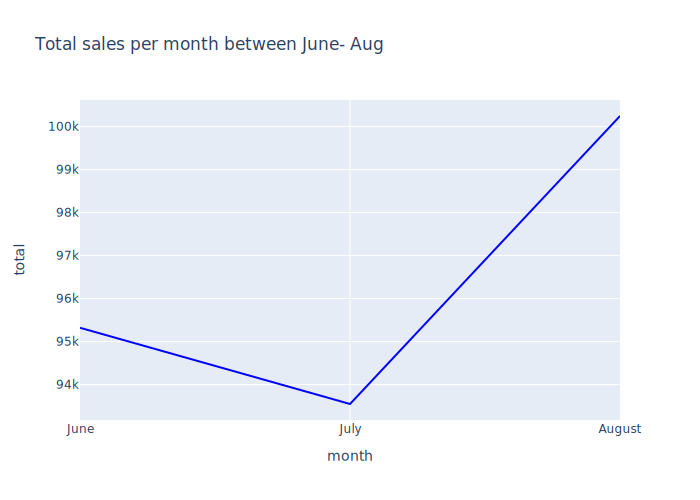

In [27]:
fig = px.line(month_total_sales , x=month_total_sales .index, y="total",
             title = 'Total sales per month between June- Aug', color_discrete_sequence=['blue'])
fig.show()

*There seems to be a drop of sales from June to July but in August, total sales increase and also did much better than June.*

### Average total sales based on day of the week

In [28]:
avg_dayofweek_sales = df.groupby('dayofweek')[['total']].mean()
avg_dayofweek_sales.rename(index ={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday'
                                   ,4:'Friday',5:'Saturday',6:'Sunday'}, inplace =True)

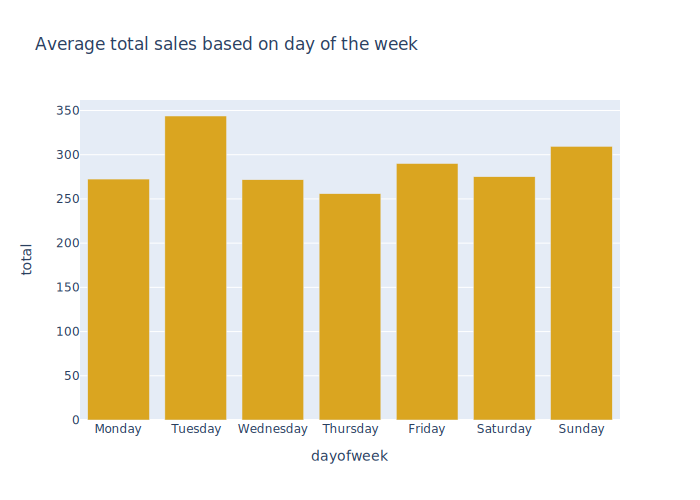

In [29]:
fig = px.bar(avg_dayofweek_sales, x=avg_dayofweek_sales  .index, y="total",
             title = 'Average total sales based on day of the week', color_discrete_sequence=['goldenrod'])
fig.show()

*This shows that in general during this period, Tuesdays tends have highest average sales.*

## Summary of Findings

1. Transfer payment type make up most of the sales at 55.2%. It was also found that only transfer payment type is being made for wholesale.
2. 55.2% of the total sales also unsurprisngly comes from Wholesales instead of Retail. <br />
   This is due to wholesales having 4x higher quantity bought in average whichich also leads to having higher average sales than   retail.
3. Engine has the highest average unit price and also has the highest average total sales price among the other product line
4. Suspension & Traction however have the highest total sales for both client types although it does not have the highest average unit price. <br/>
   This shows that this product is most seek item during this period and also most profitable.
5. -1.8% drop of total sales was found from June to July but then a +7.1% growth of sales from July to August
6. Tuesdays are found to have higher average sales as compared to other day of the week.
7. Quantity sold for braking system is as close as Suspension&Traction but does not make as much total sales.<br/> This shows that this product does not bring as much profit since it is also shows that is has the lowest average unit price